In [36]:
import matplotlib.pyplot as plt

from skimage import data, io, color, segmentation
from skimage.filters import sobel, rank
from skimage.future import graph
from skimage.measure import find_contours
from skimage.morphology import disk, watershed
from skimage.util import img_as_ubyte

from scipy import ndimage as ndi

%matplotlib inline

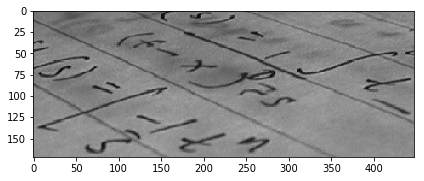

In [2]:
img = data.text()
io.imshow(img)

C:\Users\Hp\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


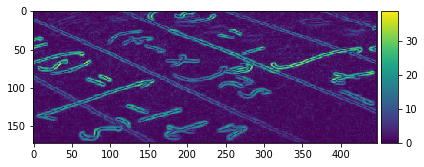

In [5]:
img_edges = sobel(img)
io.imshow(img_edges * 100)

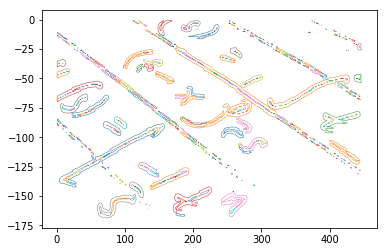

In [10]:
from skimage.measure import find_contours
contours = find_contours(img_edges, 0.1)
for contour in contours :
    plt.plot(contour[:,1], -contour[:,0], linewidth=0.5)

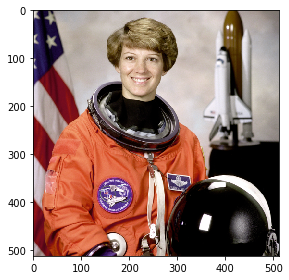

In [11]:
img = data.astronaut()
io.imshow(img)

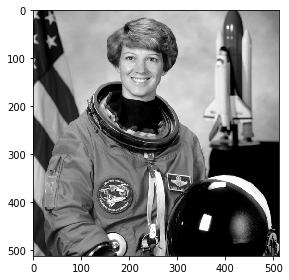

In [19]:
from skimage import color
img_gray = color.rgb2gray(img)
io.imshow(img_gray)

C:\Users\Hp\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


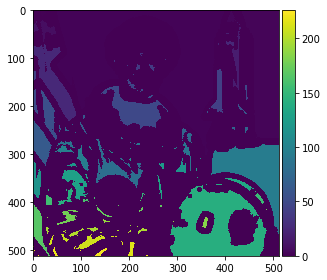

In [22]:
img_gray = img_as_ubyte(img_gray)
markers = rank.gradient(img_gray, disk(5)) < 30
markers = ndi.label(markers)[0]
io.imshow(markers)

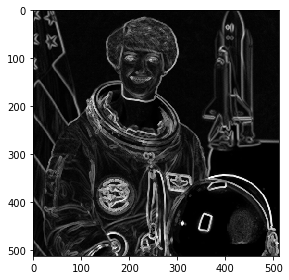

In [25]:
gradient = rank.gradient(img_gray, disk(2))
io.imshow(gradient)

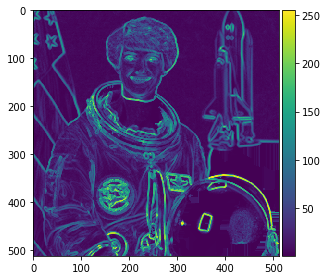

In [26]:
img_seg = watershed(markers, gradient)
io.imshow(img_seg)

C:\Users\Hp\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


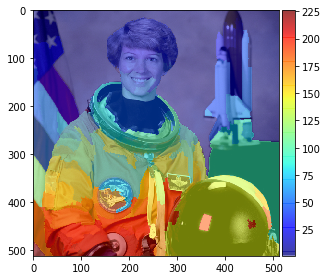

In [37]:
img_seg = watershed(gradient, markers)
io.imshow(img)
io.imshow(img_seg, cmap='jet', alpha=0.5)

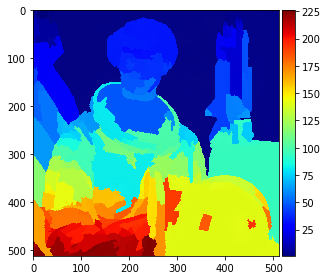

In [38]:
img_seg = watershed(gradient, markers)
io.imshow(img)
io.imshow(img_seg, cmap='jet', alpha=5)

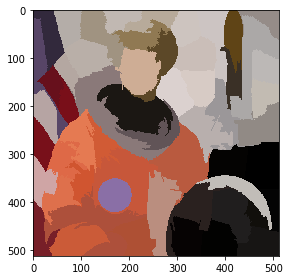

In [44]:
img_seg = segmentation.slic(img, n_segments=100, compactness=10.0)
superpixel = color.label2rgb(img_seg, img, kind='avg')
io.imshow(superpixel)

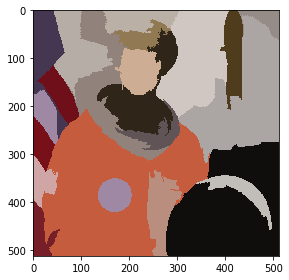

In [48]:
seg_graph = graph.rag_mean_color(img, img_seg, mode='similarity')
img_cut = graph.cut_normalized(img_seg, seg_graph)
img_cut = color.label2rgb(img_cut, img, kind='avg')
io.imshow(img_cut)